## Q(t,x,y,z)
Lo tenemos definido de esta forma en forma de array también, primer término el tiempo luego 3D [t,x,y,z]

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
dx = 0.1e-6
dy = 0.1e-6
dz = 1e-9
dt = 10e-15

In [3]:
start_t = 0
stop_t = 5e-12

## Simetría X,Y
start_x = -10e-6
stop_x = 10e-6
start_y = -10e-6
stop_y = 10e-6

start_z = 0
stop_z = 500e-9


x = np.linspace(0,stop_x,int(4*round((stop_x-0)/(dx))))
y = np.linspace(0,stop_y,int(4*round((stop_y-0)/(dy))))
z = np.linspace(start_z,stop_z,abs(int(round((stop_z-start_z)/dz))))
t = np.linspace(start_t,stop_t,int(round((stop_t-start_t)/dt)))

X,Y,Z = np.meshgrid(x,y,z)

In [4]:
ke = 235 # J/(mK s)
k = 134.5 # J /(m^3 k^2)
G = 5.69e17 # J /(m^3 K s)
Cl = 2.42e6  # J /(m^3 K)
R = 0.88 # A.U.
delta = 20e-9 # nm
ball_len = 100e-9 # nm
T0 = 300 # K
tp = 100e-15 # fs
w0 = 12.4e-6 # um

## Distancia de Rayleigh
n = 1 # Coef Refl Aire
wavelength = 1032e-9 # nm
Zr = n*np.pi* w0**2 / wavelength
F = 2 # J /cm**2

x0 = 0 # Posición central del Spot en x
y0 = 0 # Posición central del Spot en y

In [5]:
#
w = w0 * (1 + z**2/Zr**2)**0.5
T = (1/tp) * (4*np.log(2)/np.pi)**0.5 * np.exp(-4*np.log(2)*((t-2*tp)/tp)**2)

In [6]:
S = (1-R)/ (delta + ball_len) * F * w0**2/w**2 * np.exp(
    -Z/(delta + ball_len) - (((X-x0)**2 + (Y-y0)**2)/w**2))
S = S.astype(np.float32)

In [7]:
Q = np.empty((45, S.shape[0],S.shape[1],S.shape[2]),dtype = np.float32)

In [8]:
for i in range(45):
    Q[i] = S*T[i]
    if (S*T[i]).all() < 1e-5:
        break
# Q.shape
### TIEMPO(45 pasos) X(200 pasos) Y(200 pasos) Z(500 pasos)

(45, 400, 400, 500)

In [31]:
times = [0,20,25,40]

time1 = int(times[0])
time2 = int(times[1])
time3 = int(times[2])
time4 = int(times[3])

z1 = 0
z2 = 0
y1 = 12
y2 = 12

## X-Y
data1 = Q[time1,:,:,z1]
data2 = Q[time2,:,:,z1]
data3 = Q[time3,:,:,z1]
data4 = Q[time4,:,:,z1]




## X-Z
dataz1 = Q[time1,:,y1,:]
dataz2 = Q[time2,:,y1,:]
dataz3 = Q[time3,:,y1,:]
dataz4 = Q[time4,:,y1,:]


## Giro para mejorar la visión del X-Z
rotated_img_1 = ndimage.rotate(dataz1, 270)
rotated_img_1 = np.flip(rotated_img_1,1)
rotated_img_2 = ndimage.rotate(dataz2, 270)
rotated_img_2 = np.flip(rotated_img_2,1)
rotated_img_3 = ndimage.rotate(dataz3, 270)
rotated_img_3 = np.flip(rotated_img_3,1)
rotated_img_4 = ndimage.rotate(dataz4, 270)
rotated_img_4 = np.flip(rotated_img_4,1)

minmin = np.min([np.min(data1), np.min(data2),np.min(data3), np.min(data4)])
maxmax = np.max([np.max(data1), np.max(data2),np.max(data3), np.max(data4)])

minminz = np.min([np.min(data1), np.min(data2),np.min(data3), np.min(data4),np.min(rotated_img_1), np.min(rotated_img_2),np.min(rotated_img_3), np.min(rotated_img_4)])
maxmaxz = np.max([np.max(data1), np.max(data2),np.max(data3), np.max(data4),np.max(rotated_img_1), np.max(rotated_img_2),np.max(rotated_img_3), np.max(rotated_img_4)])


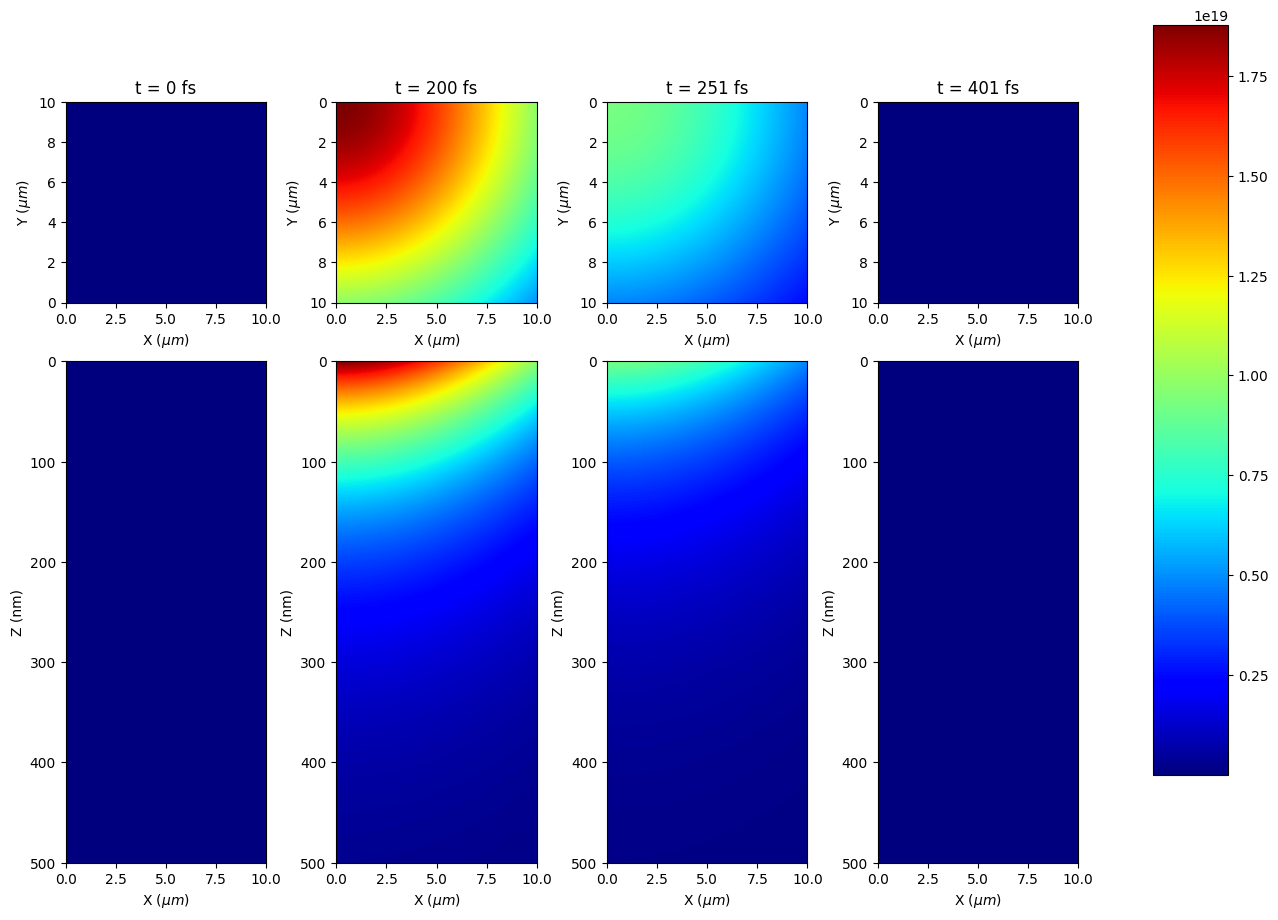

In [40]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4,figsize = (15,15),sharex=False,sharey=False)
plt.subplots_adjust(hspace=-0.45,wspace = 0.35)
#----------------------------------- GRAFICAS X-Y ---------------------------------------------
im1 = ax1.imshow(Q[time1,:,:,0],vmin=minmin, vmax=maxmax,extent=[x[0]*1e6,x[-1]*1e6,y[0]*1e6,y[-1]*1e6],cmap = 'jet')
# cbar1 = plt.colorbar(im1)
ax1.set_title(f"t = {t[time1]*1e15:.0f} fs")
ax1.set_xlabel("X $(\mu m)$")
ax1.set_ylabel("Y $(\mu m)$")

im2 = ax2.imshow(Q[time2,:,:,0],vmin=minmin, vmax=maxmax,extent=[x[0]*1e6,x[-1]*1e6,y[-1]*1e6,y[0]*1e6],cmap = 'jet')
# cbar1 = plt.colorbar(im1)
ax2.set_title(f"t = {t[time2]*1e15:.0f} fs")
ax2.set_xlabel("X $(\mu m)$")
ax2.set_ylabel("Y $(\mu m)$")

im3 = ax3.imshow(Q[time3,:,:,0],vmin=minmin, vmax=maxmax,extent=[x[0]*1e6,x[-1]*1e6,y[-1]*1e6,y[0]*1e6],cmap = 'jet')
# cbar1 = plt.colorbar(im1)
ax3.set_title(f"t = {t[time3]*1e15:.0f} fs")
ax3.set_xlabel("X $(\mu m)$")
ax3.set_ylabel("Y $(\mu m)$")

im4 = ax4.imshow(Q[time4,:,:,0],vmin=minmin, vmax=maxmax,extent=[x[0]*1e6,x[-1]*1e6,y[-1]*1e6,y[0]*1e6],cmap = 'jet')
# cbar1 = plt.colorbar(im1)
ax4.set_title(f"t = {t[time4]*1e15:.0f} fs")
ax4.set_xlabel("X $(\mu m)$")
ax4.set_ylabel("Y $(\mu m)$")
# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.53, 0.05, 0.2])
# fig.colorbar(im1, cax=cbar_ax,cmap = 'jet')

#-------------------------------------------------------------------------------------------------------


#----------------------------------- GRAFICAS X-Z ---------------------------------------------

im5 = ax5.imshow(rotated_img_1,vmin=minmin, vmax=maxmax, extent=[x[0]*1e6,x[-1]*1e6,z[-1]*1e9,z[0]*1e9],cmap = 'jet',aspect = 0.05)
# cbar2 = plt.colorbar(im2)
# ax5.set_title(f"t = {t[time1]*1e15:.0f} fs")
ax5.set_xlabel("X $(\mu m)$")
ax5.set_ylabel("Z (nm)")

## Giro para mejorar la visión del X-Z
im6 = ax6.imshow(rotated_img_2,vmin=minmin, vmax=maxmax, extent=[x[0]*1e6,x[-1]*1e6,z[-1]*1e9,z[0]*1e9],cmap = 'jet',aspect = 0.05)
# cbar2 = plt.colorbar(im2)
# ax6.set_title(f"t = {t[time2]*1e15:.0f} fs")
ax6.set_xlabel("X $(\mu m)$")
ax6.set_ylabel("Z (nm)")

## Giro para mejorar la visión del X-Z
im7 = ax7.imshow(rotated_img_3,vmin=minmin, vmax=maxmax, extent=[x[0]*1e6,x[-1]*1e6,z[-1]*1e9,z[0]*1e9],cmap = 'jet',aspect = 0.05)
# cbar2 = plt.colorbar(im2)
# ax7.set_title(f"t = {t[time3]*1e15:.0f} fs")
ax7.set_xlabel("X $(\mu m)$")
ax7.set_ylabel("Z (nm)")

## Giro para mejorar la visión del X-Z
im8 = ax8.imshow(rotated_img_4,vmin=minmin, vmax=maxmax, extent=[x[0]*1e6,x[-1]*1e6,z[-1]*1e9,z[0]*1e9],cmap = 'jet',aspect = 0.05)
# cbar2 = plt.colorbar(im2)
# ax8.set_title(f"t = {t[time4]*1e15:.0f} fs")
ax8.set_xlabel("X $(\mu m)$")
ax8.set_ylabel("Z (nm)")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.250, 0.05, 0.5])
fig.colorbar(im1, cax=cbar_ax,cmap = 'jet');


### Simetría para recuperar todos los valores

Usado por cuadrantes  
[1,0]  
[2,3]

In [39]:
Q_reduced_3 = Q
Q_reduced_1 = np.flip(Q_reduced_3,axis = [1,2])
Q_reduced_2 = np.flip(Q_reduced_3,axis = [2])
Q_reduced_0 = np.flip(Q_reduced_3,axis = 1)